In [1]:
import sounddevice #pip install sounddevice

for i in range(30): #30 updates in 1 second
    rec = sounddevice.rec(44100/30)
    sounddevice.wait()
    print(rec.shape)

TypeError: Unable to determine number of input channels

In [3]:
import pyaudio
import numpy as np

CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK) #uses default input device

# create a numpy array holding a single read of audio data
for i in range(100): #to it a few times just to see
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    print(data)

# close the stream gracefully
stream.stop_stream()
stream.close()
p.terminate()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


[ 0  0  0 ... 17 11  4]
[ -11  -37  -52 ... -115 -100  -83]
[-82 -77 -72 ... 106  57  21]
[ -32  -99 -109 ...   -9  -53  -92]
[-115 -141 -175 ...  -20  -13   -7]
[   0   -1   -6 ... -112  -68  -18]
[ 22  51  78 ...  71 111 155]
[  194   214   236 ... -1033 -1038 -1024]
[-1003  -999 -1006 ... -2265 -2574 -2805]
[-2923 -2906 -2763 ...  1991  2049  2053]
[ 2014  1940  1832 ... -1375 -1292 -1225]
[-1167 -1110 -1067 ...  1507  1422  1323]
[1225 1125 1033 ... -483 -500 -509]
[-493 -457 -411 ... -449 -420 -391]
[-353 -321 -306 ... -850 -689 -512]
[-316 -113   92 ...    5  -60 -140]
[ -225  -309  -388 ... -1294 -1452 -1607]
[-1735 -1829 -1888 ...   385   377   352]
[310 252 171 ... 307 328 349]
[365 384 406 ...  43  33  31]
[  31   26   29 ... -124  -30   47]
[  66  -16 -140 ...  532  586  631]
[ 665  689  701 ... -284 -216 -162]
[-116  -74  -31 ...  642  642  637]
[633 623 613 ...  42  48  44]
[ 36  22  16 ... 163 108  44]
[ -22  -90 -149 ... -189 -175 -153]
[-125 -108  -89 ...  146  164  184

In [4]:
data

array([1509, 1328, 1176, ...,  125,  224,  307], dtype=int16)

In [5]:
data.shape

(4096,)

<IPython.core.display.Javascript object>


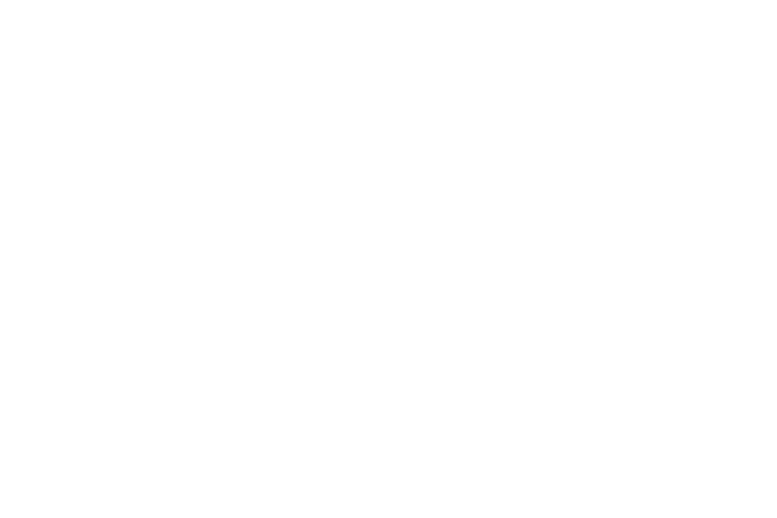

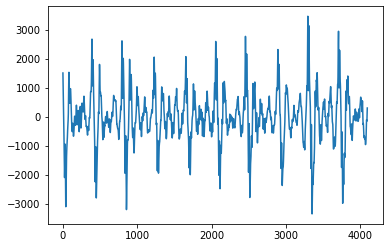

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mp
mp.use('nbAgg')
plt.plot(data)

In [9]:
import pyaudio
import numpy as np

CHUNK = 2**11
RATE = 44100

p=pyaudio.PyAudio()
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK)

for i in range(int(10*44100/1024)): #go for a few seconds
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    peak=np.average(np.abs(data))*2
    bars="#"*int(50*peak/2**16)
    print("%04d %05d %s"%(i,peak,bars))

stream.stop_stream()
stream.close()
p.terminate()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


0000 00400 
0001 00217 
0002 00216 
0003 00238 
0004 00278 
0005 00223 
0006 00228 
0007 00210 
0008 00205 
0009 00200 
0010 00184 
0011 00182 
0012 00248 
0013 00203 
0014 00469 
0015 00240 
0016 00433 
0017 00405 
0018 00327 
0019 00471 
0020 00880 
0021 01353 #
0022 01638 #
0023 02269 #
0024 03547 ##
0025 03435 ##
0026 03086 ##
0027 02941 ##
0028 02525 #
0029 02265 #
0030 02064 #
0031 02355 #
0032 02138 #
0033 01818 #
0034 01881 #
0035 01810 #
0036 02002 #
0037 02219 #
0038 02205 #
0039 02618 #
0040 02089 #
0041 03508 ##
0042 04030 ###
0043 03338 ##
0044 03784 ##
0045 03121 ##
0046 03338 ##
0047 03175 ##
0048 02268 #
0049 02722 ##
0050 02527 #
0051 02954 ##
0052 01774 #
0053 02073 #
0054 02306 #
0055 02944 ##
0056 03286 ##
0057 02985 ##
0058 02551 #
0059 02303 #
0060 02250 #
0061 01971 #
0062 01934 #
0063 01883 #
0064 01878 #
0065 01646 #
0066 01656 #
0067 01504 #
0068 01153 
0069 01043 
0070 00907 
0071 00703 
0072 00558 
0073 00134 
0074 00130 
0075 00077 
0076 00061 
0077 00054 


In [1]:
import pyaudio
import numpy as np
import pylab
import time

RATE = 44100
CHUNK = int(RATE/20) # RATE / number of updates per second
CHUNK = 2048

def soundplot(stream):
    t1=time.time()
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    pylab.plot(data)
    pylab.title(i)
    pylab.grid()
    pylab.axis([0,len(data),-2**16/2,2**16/2])
    pylab.savefig("03.png",dpi=50)
    pylab.close('all')
    print("took %.02f ms"%((time.time()-t1)*1000))

if __name__=="__main__":
    p=pyaudio.PyAudio()
    stream=p.open(
        format=pyaudio.paInt16,
        channels=1,
        rate=RATE,
        input=True,          
        frames_per_buffer=CHUNK
    )
    for i in range(int(20*RATE/CHUNK)): #do this for 10 seconds
        soundplot(stream)
    stream.stop_stream()
    stream.close()
    p.terminate()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


took 474.80 ms


OSError: [Errno -9981] Input overflowed

In [ ]:
https://swharden.com/wp/2016-07-19-realtime-audio-visualization-in-python/